Model Training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings

In [5]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df['Total_score']=df['math_score']+df['writing_score']+df['reading_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [7]:
df.to_csv('stud_updated.csv')

In [8]:
X = df.iloc[:,:-1]
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
y = df.iloc[:,-1]
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total_score, Length: 1000, dtype: int64

In [10]:
numerical_features = X.select_dtypes(exclude='object').columns
numerical_features

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [11]:
categorical_features = X.select_dtypes(include='object').columns
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

- Now we will convert the object features into numerical
- We will standardize the numerical features

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

column_transformer = ColumnTransformer(
    [
        ("StandardScaler",scaler,numerical_features),
        ("OnehotEncoder",encoder,categorical_features)
    ]
)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=93)

In [14]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [15]:
X_train.shape,X_test.shape

((800, 20), (200, 20))

Creating a function for evaluation

In [16]:
def evaluation(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mean_squared_error(true,pred))
    r2score = r2_score(true,pred)
    return mae,mse,rmse,r2score

In [17]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree":DecisionTreeRegressor(),
    "KNeighbors":KNeighborsRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machine":SVR(),
    "Adaboost":AdaBoostRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "Xgboost":XGBRegressor(),
    "catboost":CatBoostRegressor()
}
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_mae,model_mse,model_rmse,model_r2score = evaluation(y_test,y_pred)
    print(list(models.keys())[i])
    print("Model Performance for Test set")
    print(f"Mae : {model_mae}")
    print(f"Mse : {model_mse}")
    print(f"Rmse : {model_rmse}")
    print(f"r2 score : {model_r2score}")
    r2_list.append(model_r2score)

Linear Regression
Model Performance for Test set
Mae : 1.3216094885137864e-14
Mse : 4.503449135725712e-28
Rmse : 2.122133156926236e-14
r2 score : 1.0
Lasso
Model Performance for Test set
Mae : 0.8364553895295412
Mse : 1.074126139631104
Rmse : 1.0364005691001448
r2 score : 0.9994005766402622
Ridge
Model Performance for Test set
Mae : 0.021488421632226674
Mse : 0.0007204538256537204
Rmse : 0.02684127093961313
r2 score : 0.999999597945868
Decision Tree
Model Performance for Test set
Mae : 3.45
Mse : 21.08
Rmse : 4.591296113299598
r2 score : 0.9882361633731273
KNeighbors
Model Performance for Test set
Mae : 7.039000000000001
Mse : 79.18100000000003
Rmse : 8.898370637369519
r2 score : 0.9558125072128837
Random Forest
Model Performance for Test set
Mae : 1.7124000000000006
Mse : 6.676886000000001
Rmse : 2.583967105053778
r2 score : 0.9962739185920183
Support Vector Machine
Model Performance for Test set
Mae : 6.966412329083733
Mse : 248.52430441638188
Rmse : 15.764653640863218
r2 score : 0.8

In [18]:
r2_list

[1.0,
 0.9994005766402622,
 0.999999597945868,
 0.9882361633731273,
 0.9558125072128837,
 0.9962739185920183,
 0.8613093304097956,
 0.9763079342888575,
 0.9978294588885614,
 0.9970726370811462,
 0.9986192214732766]

In [19]:
model_list = list(models)
print(model_list)

['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'KNeighbors', 'Random Forest', 'Support Vector Machine', 'Adaboost', 'Gradient Boost', 'Xgboost', 'catboost']


In [20]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Models,R2 Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999401
10,catboost,0.998619
8,Gradient Boost,0.997829
9,Xgboost,0.997073
5,Random Forest,0.996274
3,Decision Tree,0.988236
7,Adaboost,0.976308
4,KNeighbors,0.955813


The Best Performing models are here Linear Regression and Ridge

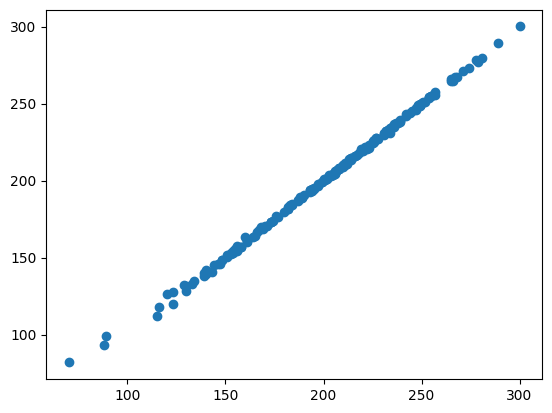

In [21]:
plt.scatter(y_test,y_pred)


<Axes: xlabel='Total_score'>

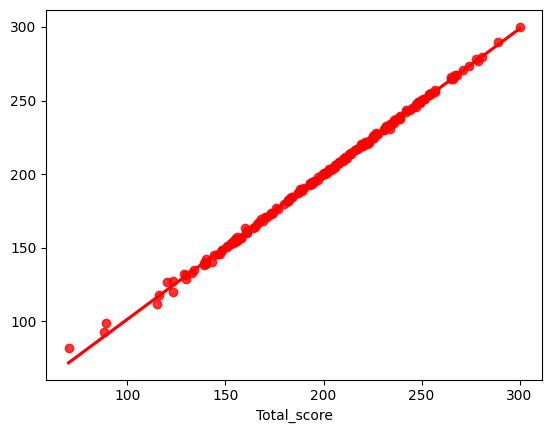

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
328,234,233.999226,0.000774
803,254,254.021306,-0.021306
928,133,133.069033,-0.069033
158,234,230.634284,3.365716
662,195,194.875128,0.124872
...,...,...,...
559,201,200.404145,0.595855
907,254,254.400519,-0.400519
718,226,224.895258,1.104742
105,197,197.749607,-0.749607
